# **Programa Brasil na Escola**

---

## **Objetivos**

- Verificar outliers de dataset de escolas que aderiram ao programa Brasil na Escola no Brasil;

- Estudar correlações entre as variáveis, após a limpeza;

- Expor modelo de regressão linear que sirva como preditor entre as variáveis, após a limpeza;

- Verificar se algum dos modelos obtidos consegue ter bom desempenho para os outliers.

## **Fonte**

<a href = "https://dados.gov.br/dados/conjuntos-dados/base-de-escolas-que-aderiram-ao-programa-brasil-na-escola"> Base de escolas que aderiram ao Programa Brasil na Escola </href>

---

## **Análise de dados**

## Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## Carregar Dataset

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,UF,TOTAL_ESCOLA,MATRICULAS,VERBA
0,AC,81,4660,1509000.0
1,AL,99,24862,4719300.0
2,AM,689,50753,14502950.0
3,AP,70,12150,2522500.0
4,BA,1135,230830,45974500.0
5,CE,496,68126,15178900.0
6,DF,2,1281,212150.0
7,ES,28,4486,952900.0
8,GO,31,3947,902050.0
9,MA,1690,182166,44224900.0


In [4]:
df.shape

(27, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UF            27 non-null     object 
 1   TOTAL_ESCOLA  27 non-null     int64  
 2   MATRICULAS    27 non-null     int64  
 3   VERBA         27 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 992.0+ bytes


In [6]:
df.describe()

,TOTAL_ESCOLA,MATRICULAS,VERBA
count,27.000000,27.000000,2.700000e+01
mean,294.000000,43153.740741,9.413061e+06
std,418.356675,59385.263836,1.289032e+07
min,2.000000,1223.000000,2.121500e+05
25%,31.000000,4284.000000,9.376000e+05
50%,99.000000,18711.000000,4.366650e+06
75%,347.000000,50537.000000,1.079422e+07
max,1690.000000,230830.000000,4.597450e+07


In [7]:
df.isnull().sum()

UF              0
TOTAL_ESCOLA    0
MATRICULAS      0
VERBA           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Outliers

Inicialmente, podemos ter outliers entre os dados do nosso problema. Inicialmente, seria interessante visualizá-los graficamente de alguma forma.

Façamos isso usando três gráficos de barras, relacionando ``UF`` às demais colunas do dataset:

In [9]:
escolas = px.bar(
    df.sort_values("TOTAL_ESCOLA", ascending=False),
    x="UF",
    y="TOTAL_ESCOLA",
    title="Total de Escolas por Estado",
)

max_escolas = max(df["TOTAL_ESCOLA"]) * 1.25

escolas.update_yaxes(range=[0, max_escolas])

matriculas = px.bar(
    df.sort_values("MATRICULAS", ascending=False),
    x="UF",
    y="MATRICULAS",
    title="Matrículas por Estado"
)

max_matriculas = max(df["MATRICULAS"]) * 1.5

matriculas.update_yaxes(range=[0, max_matriculas])

verba = px.bar(
    df.sort_values("VERBA", ascending=False),
    x="UF",
    y="VERBA",
    title="Verba por Estado"
)

max_verba = max(df["VERBA"]) * 1.25

verba.update_yaxes(range=[0, max_verba])

escolas.show()
matriculas.show()
verba.show()

As mesmas informações representamos abaixo em boxplot (por região, para melhor visualização):

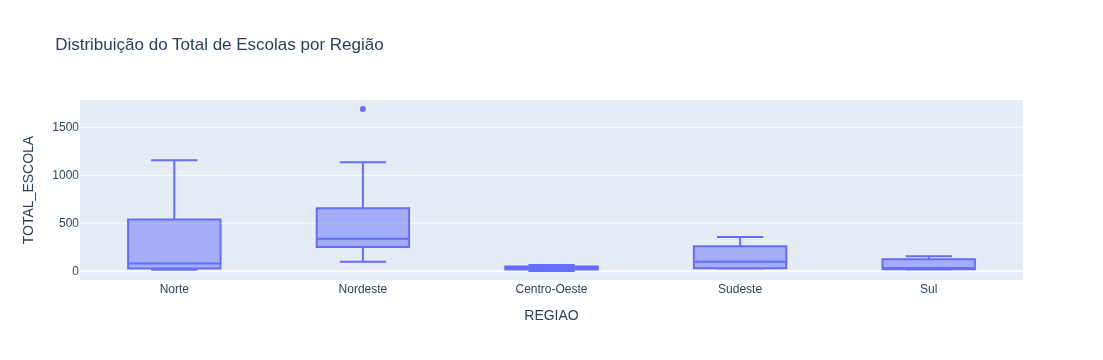

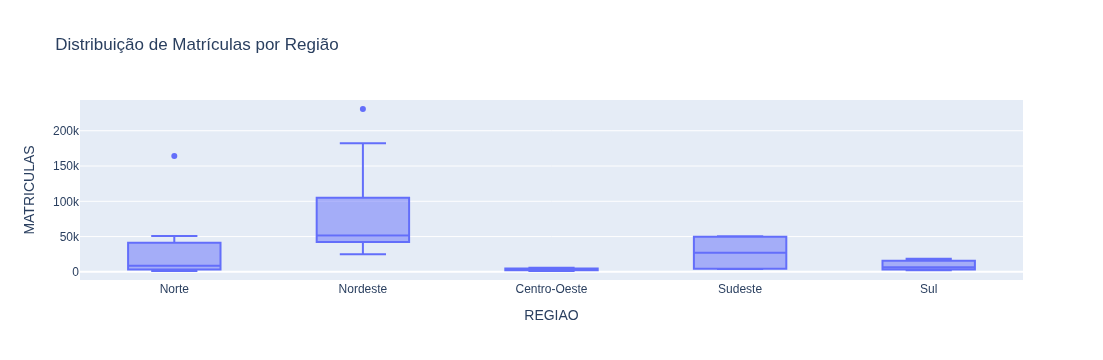

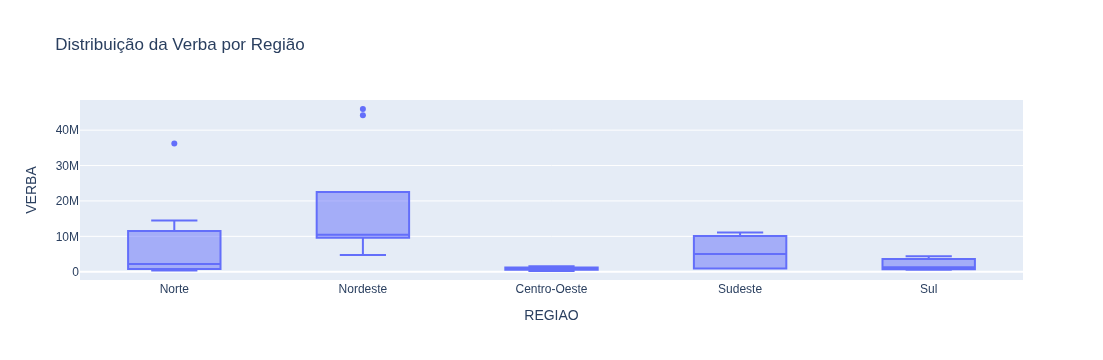

In [10]:
df_regions = df.copy()

NORTE = ["AC", "AM", "AP", "PA", "RO", "RR", "TO"]
NORDESTE = ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]
CENTRO_OESTE = ["DF", "GO", "MT", "MS"]
SUDESTE = ["ES", "MG", "RJ", "SP"]
SUL = ["PR", "RS", "SC"]

def classificar_regiao(uf):
    if uf in NORTE:
        return "Norte"
    elif uf in NORDESTE:
        return "Nordeste"
    elif uf in CENTRO_OESTE:
        return "Centro-Oeste"
    elif uf in SUDESTE:
        return "Sudeste"
    elif uf in SUL:
        return "Sul"
    else:
        return "Outro"

df_regions["REGIAO"] = df["UF"].apply(classificar_regiao)

escolas = px.box(
    df_regions,
    x="REGIAO",
    y="TOTAL_ESCOLA",
    title="Distribuição do Total de Escolas por Região",
    category_orders={"REGIAO": ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]}
)

matriculas = px.box(
    df_regions,
    x="REGIAO",
    y="MATRICULAS",
    title="Distribuição de Matrículas por Região",
    category_orders={"REGIAO": ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]}
)

verba = px.box(
    df_regions,
    x="REGIAO",
    y="VERBA",
    title="Distribuição da Verba por Região",
    category_orders={"REGIAO": ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]}
)

escolas.show()
matriculas.show()
verba.show()

Vemos que, de fato, há outliers (visivelmente, Bahia, Maranhão e Pará).

## Modelo Preditivo

Para conseguirmos realizar uma análise estatística mais precisa, procederemos à remoção dos outliers em uma cópia do dataframe:

In [11]:
df_clean = df.copy()
df_numeric = df_clean.select_dtypes(include=["int64", "float64"])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

df_clean = df_clean[~outlier_mask].reset_index()

In [12]:
df_clean

,index,UF,TOTAL_ESCOLA,MATRICULAS,VERBA
0,0,AC,81,4660,1509000.0
1,1,AL,99,24862,4719300.0
2,2,AM,689,50753,14502950.0
3,3,AP,70,12150,2522500.0
4,5,CE,496,68126,15178900.0
5,6,DF,2,1281,212150.0
6,7,ES,28,4486,952900.0
7,8,GO,31,3947,902050.0
8,10,MG,357,50321,11118150.0
9,11,MS,31,3628,854200.0


In [13]:
df_clean.shape

(24, 5)

Vamos montar a correlação entre as variáveis numéricas:

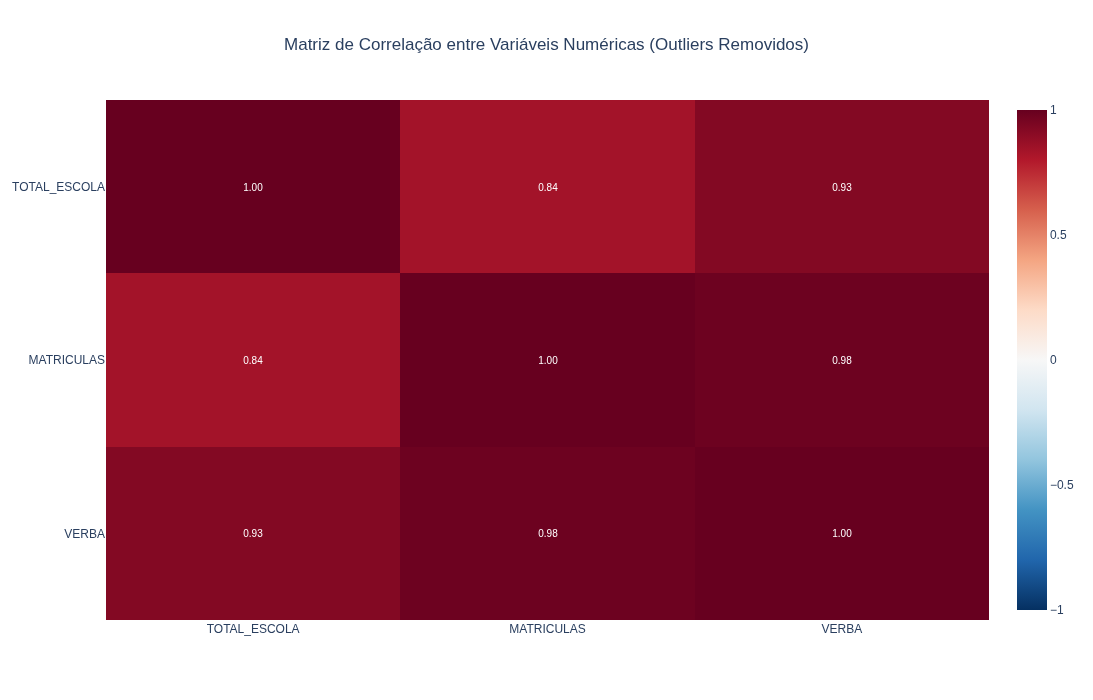

In [14]:
df_numeric = df_numeric.loc[~outlier_mask].reset_index(drop=True)

corr = df_numeric.corr()

fig = px.imshow(
    corr,
    text_auto = ".2f",
    aspect = "auto",
    color_continuous_scale = "RdBu_r",
    range_color = [-1, 1],
    title = "Matriz de Correlação entre Variáveis Numéricas (Outliers Removidos)"
)

fig.update_layout(
    title_x=0.5,
    width = 800,
    height = 700
)

fig.update_traces(textfont = {"size": 10})

fig.show()

Vemos então que todas as variáveis apresentam correlação positiva e consideravelmente elevada. Podemos lançar mão desse artifício para realizar análises preditivas entre elas.

Nesse sentido, propomos um modelo de regressão linear sobre ``TOTAL_ESCOLAS`` de ``MATRICULAS`` e ``VERBA``

In [15]:
def plot_regression_with_full_data(x_col, y_col, df_full, df_clean, title):
    slope, intercept = np.polyfit(df_clean[x_col], df_clean[y_col], 1)
    
    x_range = np.linspace(df_full[x_col].min(), df_full[x_col].max(), 100)
    y_pred = slope * x_range + intercept
    
    fig = px.scatter(df_full, x=x_col, y=y_col, title=title)
    
    fig.add_scatter(x=x_range, y=y_pred, mode="lines", 
                   name=f'Regressão: y = {slope:.2f}x + {intercept:.2f}',
                   line=dict(color="red", width=2))
    
    fig.add_annotation(
        x=0.05, y=0.95,
        xref="paper", yref="paper",
        text=f"y = {slope:.2f}x + {intercept:.2f}",
        showarrow=False,
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )
    
    return fig

fig_matriculas = plot_regression_with_full_data(
    x_col="TOTAL_ESCOLA",
    y_col="MATRICULAS",
    df_full=df,
    df_clean=df_clean,
    title="Regressão: MATRICULAS vs TOTAL_ESCOLA"
)
fig_matriculas.show()

fig_verba = plot_regression_with_full_data(
    x_col="TOTAL_ESCOLA",
    y_col="VERBA",
    df_full=df,
    df_clean=df_clean,
    title="Regressão: VERBA vs TOTAL_ESCOLA"
)
fig_verba.show()

Um dado do heatmap reflete diretamente no gráfico gerado. A saber, a correlação não-trivial mais forte não é entre ``TOTAL_ESCOLA`` e qualquer outra das duas variáveis ``MATRICULAS`` e ``VERBA``. Vejamos em um gráfico:

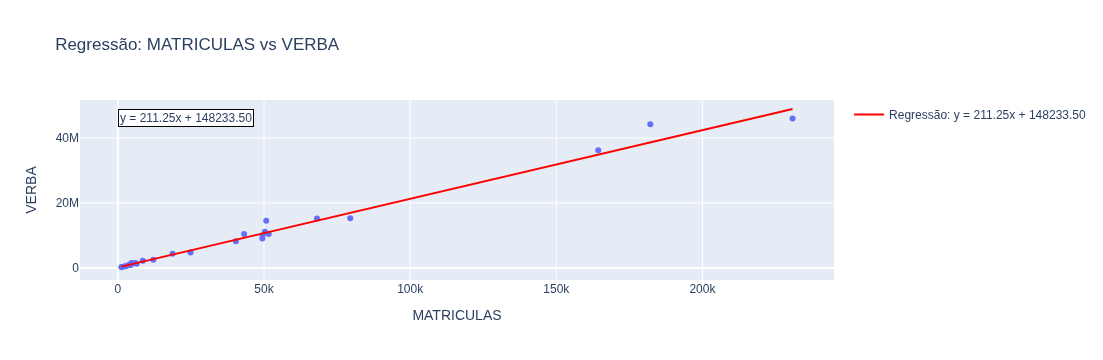

In [16]:
fig_matriculas_verba = plot_regression_with_full_data(
    x_col = "MATRICULAS",
    y_col = "VERBA",
    df_full = df,
    df_clean = df_clean,
    title = "Regressão: MATRICULAS vs VERBA"
)
fig_matriculas_verba.show()

Esse foi o modelo que teve melhor desempenho como os demais, **inclusive** para os outliers.

## **Conclusão**

- Outliers se devem a menor correlação entre ``TOTAL_ESCOLAS`` e as outras duas variáveis, ``MATRICULAS`` e ``VERBA``. No mundo real, isso reflete como existem cidades que possuem poucas escolas, mas tem um grande contingente educacional.

- ``MATRICULAS`` possui excelente correlação com ``VERBA``, conseguindo inclusive se sair bem na previsão desses outliers.

- Em conjunto, esses dados indicam que, no repasse de verbas governamentais para o Programa, é o **número de estudantes por UF** o principal parâmetro empregado.